# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from lifelines import WeibullFitter,ExponentialFitter, LogNormalFitter, LogLogisticFitter, WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

To be able to use our data in survival analysis models we need to make sure we are working with numeric and not categorical data. Thus, we have to prepare data in a way , that categories are changed into number/ranges. For that purpose, I will dummify categorical variables. 

In [2]:
telco = pd.read_csv("telco.csv")
telco.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [3]:
telco.dtypes

ID           int64
region      object
tenure       int64
age          int64
marital     object
address      int64
income       int64
ed          object
retire      object
gender      object
voice       object
internet    object
forward     object
custcat     object
churn       object
dtype: object

In [4]:
telco.set_index('ID', inplace=True)
telco['churn'] = pd.Series(np.where(telco.churn.values == "Yes", 1, 0), telco.index)
columns = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat'] 
telco = pd.get_dummies(telco, columns=columns, prefix=columns, drop_first=True)

In [5]:
# converting 0 lifetime values to a very small insignificant values, to avoid miscalculations
telco["tenure"] = np.where(telco["tenure"] == 0, 0.000001, telco["tenure"])

Now that all our columns are useful for modeling survival analysis, we can start to consider applying the models.

# AFT Models

Accelartion Failure Time models are survival time prediction parametric models, defined by various distributions, such as,  exponential, weibull, lognormal, gaussian, logistic, rayleigh, loggaussian, loglogistic and t. Let's try to implement models of each distribution, extract the best model with the best features. Since for python the *lifespan* package supports AFT fitting with only Weibull, Exponential, LogNormal and LogLogistic distributions, and I could not find a separate package online for the rest of distributions, let's enjoy the analyzes of only those 4 models below. :)

In [6]:
wf = WeibullFitter()
ef = ExponentialFitter()
lnf = LogNormalFitter()
llf = LogLogisticFitter()

AIC of WeibullFitter model is 3216.8611706815464
BIC of WeibullFitter model is 3226.676681239511


<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.43
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 138.09      12.38           113.82           162.36
rho_      0.95       0.05             0.85             1.05

          cmp to     z      p   -log2(p)
lambda_     1.00 11.07 <0.005      92.25
rho_        1.00 -1.07   0.29       1.80
---
AIC = 3216.86

AIC of ExponentialFitter model is 3215.9608134637247
BIC of ExponentialFitter model is 3220.868568742707


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 129.66       7.83           114.30           145.01

          cmp to     z      p   -log2(p)
lambda_     0.00 16.55 <0.005     202.03
---
AIC = 3215.96

AIC of LogNormalFitter model is 3209.0351474316735
BIC of LogNormalFitter model is 3218.850657989638


<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1602.52
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      4.77       0.10             4.57             4.98
sigma_   1.81       0.09             1.64             1.97

         cmp to     z      p   -log2(p)
mu_        0.00 46.06 <0.005        inf
sigma_     1.00  9.37 <0.005      66.94
---
AIC = 3209.04

AIC of LogLogisticFitter model is 3214.4154757933375
BIC of LogLogisticFitter model is 3224.230986351302


<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1605.21
               hypothesis = alpha_ != 1, beta_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
alpha_ 103.39       9.13            85.50           121.28
beta_    1.04       0.05             0.93             1.15

         cmp to     z      p   -log2(p)
alpha_     1.00 11.22 <0.005      94.60
beta_      1.00  0.73   0.46       1.11
---
AIC = 3214.42

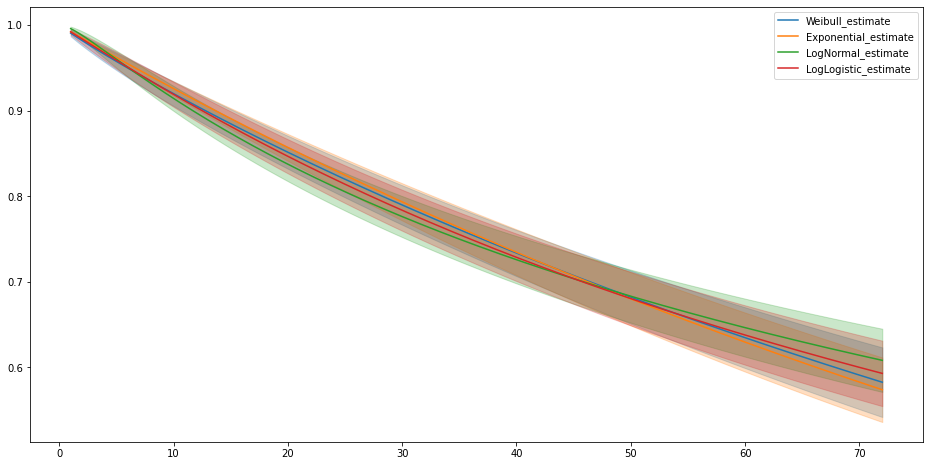

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
for model in [wf, ef, lnf, llf]:
    model.fit(durations = telco["tenure"], event_observed = telco["churn"])
    model.plot_survival_function()
    print("AIC of", model.__class__.__name__, "model is",  model.AIC_)
    print("BIC of", model.__class__.__name__, "model is",  model.BIC_) 
    model.print_summary()

When comparing models, we typically choose the model with the lowest AIC or BIC. The model with the lower value is considered to have a better balance between explaining the data and penalizing for model complexity. In our case, the AFT model with LogNormal distribution wins the lowest AIC-BIC combination nomination. Log Likelihood is another way of choosing the suitable model. We want to maximize the log-likelihood value, and as you can see in that case as well, Log Normal has the desirable value (highest log likelihood amongst all the others)

Now let's analyze the winning model and the coefficients of the features included.

In [8]:
logn_aft = LogNormalAFTFitter()
logn_aft.fit(telco, duration_col='tenure', event_col='churn')
logn_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-30 17:17:14 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

*statistical interpretation*
  
Features are statistically significant, when they have a p_value less than the value of the significance level (alpha = 5% most of the times, so p_value<5% shows the significance of a feature). For the AFT model using LogNormal distribution significant features are the following - address, age, custcat services, internet, marital status, voice services, since their p_values are small enough.  
Besides being (in)significant, features also have a purpose of affecting the model, and the effect size is defined by their coefficients. Positive coefficient in AFT models increase the hazard of churn, while negatives lower the hazard of churn. For finalizing the model, let's keep only the significant features below. 

In [9]:
telco = telco[["tenure", "churn", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]

In [10]:
logn_aft = LogNormalAFTFitter()
logn_aft.fit(telco, duration_col='tenure', event_col='churn')
logn_aft.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-30 17:17:15 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

*coefficient interpretation*
1. γ < 1 indicates that the failure rate decreases over time.
2. γ = 1 indicates that the failure rate is constant over time. The Weibull distribution reduces to an exponential distribution.
3. γ > 1 indicates that the failure rate increases with time.


- address: Positive coefficient indicates that an increase in the number of addresses is associated with a higher predicted survival time or a lower hazard of churn.
- age: An increase in age is associated with a higher predicted survival time. Again, the impact is relatively small (0.04).
- custcat_E-service: Indicates that having E-service is associated with a higher hazard of churn or a shorter predicted survival time. The coefficient (1.03) suggests a significant impact on increasing the churn hazard.
- custcat_Plus service: Similar to E-service, having Plus service is associated with a higher hazard of churn. The coefficient (0.82) is slightly smaller than E-service but still substantial.
- custcat_Total service: Indicates that having Total service is associated with a higher hazard of churn. 
- internet_Yes:  Having internet service is associated with a lower hazard of churn. The coefficient (-0.84) suggests a significant impact on reducing the churn hazard.
- marital_Unmarried: Being unmarried is associated with a lower hazard of churn. The (-0.45) indicates a moderate impact on reducing the churn hazard.
- voice_Yes: Having voice service is associated with a lower hazard of churn. The coefficient (-0.46) is similar to the effect of being unmarried.

# CLV
Time to implement Customer Lifetime Value for our users. 

In [11]:
# extracting survival probabilities
pred_clv = logn_aft.predict_survival_function(telco)

In [12]:
# let's work with the first 24 months of data
pred = pred_clv.loc[1:24, :]

In [13]:

telco_orig = pd.read_csv("telco.csv")

In [14]:
# using the CLV implementation from slides we'll have the following 

MM = 1300
r = 12
for col in range(1, len(pred.columns)+1):
    for row in range(1, 13):
        pred[col][row] = pred[col][row] / (1 + r / 12)**(row - 1)
telco_orig['CLV'] = MM * pred.sum(axis = 0)
telco_orig.CLV

<ipython-input-14-2c19bd413ceb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred[col][row] = pred[col][row] / (1 + r / 12)**(row - 1)


0               NaN
1      16467.427488
2      16594.502847
3      18111.979854
4      14314.063708
           ...     
995    16729.206725
996    13142.683185
997    12716.918842
998    17903.041151
999    17311.616096
Name: CLV, Length: 1000, dtype: float64

The values above show the customer lifetime values of each customer, applied on our original dataset. Let's also visualize the results, based on various segments.

But first, let's use simple data analyses trick to find the best segment among each segment. Than we will take a look at each graph for the mentioned features. 

In [15]:
avg_clv_by_category = telco_orig.groupby('custcat')['CLV'].mean()
best_segment = avg_clv_by_category.idxmax()
print(f"The best segment based on average CLV is: {best_segment}")

avg_clv_by_marital = telco_orig.groupby('marital')['CLV'].mean()
best_marital_status = avg_clv_by_marital.idxmax()
print(f"The best segment based on average CLV for marital status is: {best_marital_status}")


avg_clv_by_region = telco_orig.groupby('region')['CLV'].mean()
best_region = avg_clv_by_region.idxmax()
print(f"The best segment based on average CLV for region is: {best_region}")

The best segment based on average CLV is: Basic service
The best segment based on average CLV for marital status is: Married
The best segment based on average CLV for region is: Zone 1


#### customer segments
From our customer segment base,  the peak of the graph belongs to Basic Services and Plus services (blue and green). More specifically we can say that the blue curve, customers with Basic services have the greatest CLVs suggesting that they have the longest predicted survival time. 

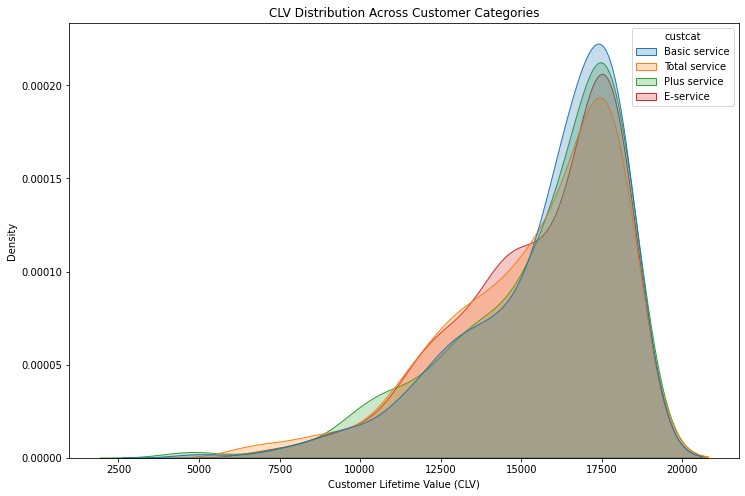

In [16]:
# across customer categories
plt.figure(figsize=(12, 8))

# CLV distribution for each customer category
clv_plot = sns.kdeplot(data=telco_orig, x='CLV', hue='custcat', fill=True, common_norm=False)
plt.title('CLV Distribution Across Customer Categories')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Density')
plt.show()


#### marital status
As you can see, Married customers are slightly ahead of Unmarried people, in a sense of having longer survival time. 

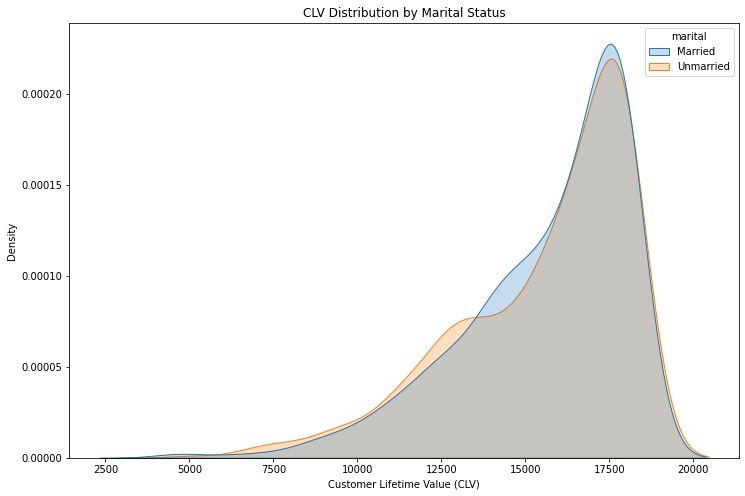

In [17]:
# accross marital status
plt.figure(figsize=(12, 8))
clv_marital_plot = sns.kdeplot(data=telco_orig, x='CLV', hue='marital', fill=True, common_norm=False)
plt.title('CLV Distribution by Marital Status')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Density')
plt.show()


#### region zones
The green curve shows the highest peak of CLV values, thus people from Zone 1 have the longest survival rates out of sll other zones.

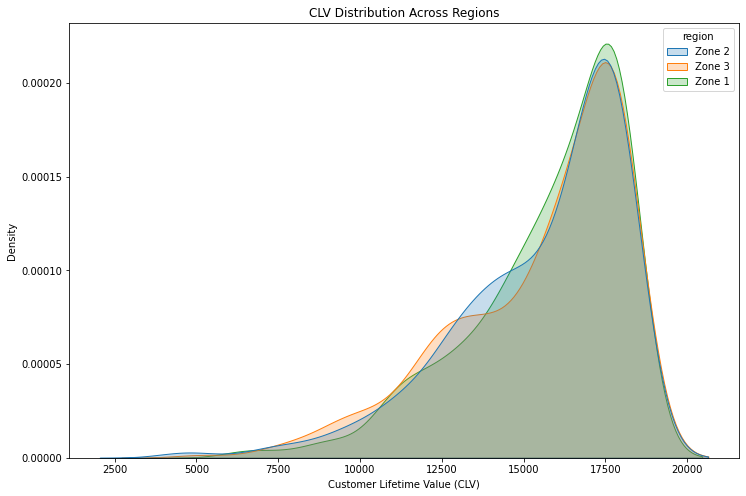

In [18]:
# across regions
plt.figure(figsize=(12, 8))
clv_region_plot = sns.kdeplot(data=telco_orig, x='CLV', hue='region', fill=True, common_norm=False)
plt.title('CLV Distribution Across Regions')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Density')
plt.show()


Assuming the data represents the population, let's see how much would our annual retention budget be?

In [19]:
# let's assume r is our monthly discount rate
r = 0.07
telco_orig['Annual_CLV'] = telco_orig['CLV'] / ((1 + r) ** (telco_orig['tenure'] / 12))

# identifying at-risk customers
at_risk_customers = telco_orig[telco_orig['CLV'] * pred.iloc[:, 0] < 3000] 

# defining the retention budget
retention_budget = at_risk_customers ['Annual_CLV'].sum()
print("Estimated Annual Retention Budget: $", round(retention_budget, 2))

Estimated Annual Retention Budget: $ 112219.11


The interpretation of the above script is the following. Retention budget shows the potential loss due to churn, and it can direct money and efforts into customer retention plans to hold onto at-risk subscribers. Here are some suggestions to avoid big numbers of churning customers, thus lowering the retention budget. 

- Ongoing Monitoring and Adaptation: Consistently monitor customer behavior, preferences, and feedback. Remain flexible and adjust retention strategies based on evolving market conditions and customer expectations.
  
- Personalized Communication: Use customer data to customize communication strategies. Deliver targeted messages, offers, and content that resonate with individual customer preferences and behaviors.
  
- Customer Segmentation: Categorize customers based on diverse criteria such as demographics, behavior, and preferences. Customize retention approaches for each segment, recognizing the unique needs of different customer groups.

- Cross-Selling and Up-Selling: Identify chances for cross-selling or up-selling by analyzing customer preferences and behavior. Recommending complementary products or services contributes to an improved overall customer experience.

- Services Renewal Reminders: Send timely subscription/services renewal reminders. Provide incentives for renewing or upgrading, and make the renewal process as seamless as possible.

- Pleasant Surprises: Use exclusive offers, personalized gifts, or early access to new features to delight the customer base and attract new ones. These thoughtful gestures can evoke positive emotions and fortify the customer-brand relationship.

